# Import Tools

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

# Data Set

Data set containing 400 samples of left and right handed people.
The ration is 3:1 with the dominant ration being right handed subjects.
This has been split into 3 sets:

* Train: 260 samples  
* Validate: 70 samples 
* Testing: 70 samples 


# Import Data Files 

In [2]:
train_dir =r'C:\Users\alexc\Desktop\data_total\data_train'
validation_dir = r'C:\Users\alexc\Desktop\data_total\data_validate'
test_dir = r'C:\Users\alexc\Desktop\data_total\data_test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Pre-Processing

* Read the picture files
* Decode the JPEG content to RGB grids of pixels
* Convert these into floating point tensors
* Rescale the pixel values between 0 - 255 to the [0,1] interval 

Generating batches of tensor image data 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 1, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 1, class_mode='binary')

Found 260 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150), batch_size = 1, class_mode='binary')

Found 70 images belonging to 2 classes.


# Create Structure

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Compile Our Model

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='mean_squared_error', optimizer = optimizers.RMSprop(lr=1e-4),metrics =['acc'])

# Best Model Only

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_model.h5", save_best_only = True)

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

# Fit Optimized Model

UNEVEN DISTRIBUTION OF CLASSES

* fit method : 

* uneven distrib: we must use class weights to under represented classes and lower to over represented

from sklearn.utils import class_weight

 class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
 model.fit(X_train, y_train, class_weight=class_weights)                          

In [12]:
history = model.fit_generator(train_generator, epochs = 50 , validation_data = validation_generator )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 260 steps, validate for 70 steps
Epoch 1/50
260/260 [==============================] - 41s 159ms/step - loss: 0.1869 - acc: 0.7654 - val_loss: 0.1879 - val_acc: 0.7143
Epoch 2/50
260/260 [==============================] - 39s 152ms/step - loss: 0.1236 - acc: 0.8577 - val_loss: 0.1061 - val_acc: 0.9143
Epoch 3/50
260/260 [==============================] - 40s 152ms/step - loss: 0.1098 - acc: 0.8769 - val_loss: 0.0451 - val_acc: 0.9571
Epoch 4/50
260/260 [==============================] - 39s 152ms/step - loss: 0.1015 - acc: 0.8885 - val_loss: 0.0406 - val_acc: 0.9571
Epoch 5/50
260/260 [==============================] - 39s 152ms/step - loss: 0.0969 - acc: 0.8962 - val_loss: 0.0541 - val_acc: 0.9429
Epoch 6/50
260/260 [==============================] - 39s 152ms/step - loss: 0.0934 - acc: 0.8962 - val_loss: 0.0473 - val_acc: 0.9571
Epoch 7/50
260/260 [=

# Plot Accuracy Values On Graph

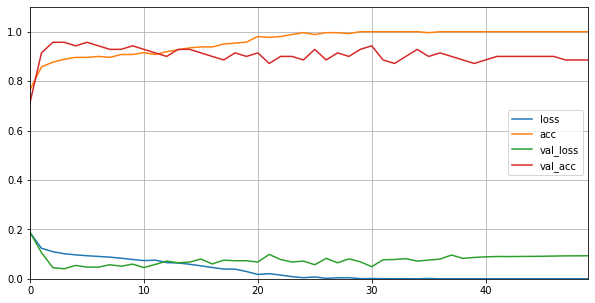

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.show()

model.save("V1model.h5")

# Saving and Restoring 

In [14]:
model.save("model_v1.h5")
%pwd
del model
keras.backend.clear_session()

In [15]:
model = keras.models.load_model("model_v1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
pred = model.predict(validation_generator )
print(validation_generator )

# Saving Best Model

In [17]:
del model
keras.backend.clear_session()

checkpoint_cb = keras.callbacks.ModelCheckpoint("early_model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.compile(loss='mean_squared_error', optimizer = optimizers.RMSprop(lr=1e-4),metrics =['acc'])

In [20]:
history = model.fit_generator(train_generator, epochs = 100 , validation_data = validation_generator,callbacks = [checkpoint_cb] )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 260 steps, validate for 70 steps
Epoch 1/100
260/260 [==============================] - 41s 159ms/step - loss: 0.1896 - acc: 0.7654 - val_loss: 0.1549 - val_acc: 0.7143
Epoch 2/100
260/260 [==============================] - 40s 152ms/step - loss: 0.1355 - acc: 0.8346 - val_loss: 0.0527 - val_acc: 0.9429
Epoch 3/100
260/260 [==============================] - 40s 153ms/step - loss: 0.1109 - acc: 0.8731 - val_loss: 0.0734 - val_acc: 0.9286
Epoch 4/100
260/260 [==============================] - 40s 152ms/step - loss: 0.1034 - acc: 0.8846 - val_loss: 0.0616 - val_acc: 0.9429
Epoch 5/100
260/260 [==============================] - 40s 153ms/step - loss: 0.0964 - acc: 0.8769 - val_loss: 0.0631 - val_acc: 0.9429
Epoch 6/100
260/260 [==============================] - 40s 153ms/step - loss: 0.0928 - acc: 0.8923 - val_loss: 0.0380 - val_acc: 0.9571
Epoch 7/100
260/260 [==============================] - 40s 153ms/step - loss: 0.0975 - acc:

In [21]:
model = keras.models.load_model("early_model.h5")
mse_test = model.evaluate(validation_generator)

  ...
    to  
  ['...']
70/70 [==============================] - 2s 27ms/step - loss: 0.0380 - acc: 0.9571
